In [480]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import numpy as np
import natsort

dir_ = '/home/estefania/thesis/multiple_protein/output_files/9m_d15/'

systems_hdp = ['S1','S2'] #+str(i) for i in range(1,4)]
prot_ndx = ['P'+str(i) for i in range(1,10)]
states = ['m']

# Nested dictionary --> {'m': {'upper': {'S1'}, 'lower': {'S1'}}, 'h':{'upper'}{'S2'}....}
rho_HPD_prot = {key1:{key2:{key3:[] for key3 in prot_ndx} for key2 in systems_hdp} for key1 in states}

rho_HPD = {state:[] for state in states}
tim='0-2'

for state in states:
         
    for system in systems_hdp:  
        
        data = np.loadtxt(dir_ + str(tim) + 'us_' + system + '-' + '9md15_protein_rho.txt')
        
        count=-1
        for key in prot_ndx:

            count=count+1

            rho_HPD_prot[state][system][key] = data[:,count]

             
for prot in ['P4', 'P7']:
    a = rho_HPD_prot['m']['S1'][prot]
    rho_HPD_prot['m']['S1'][prot] = [rho-180 if rho>150 else rho for rho in a]
        
for prot in ['P2']:
    a = rho_HPD_prot['m']['S1'][prot]
    rho_HPD_prot['m']['S1'][prot] = [rho+120 if rho<50 else rho for rho in a]
    


for prot in ['P3', 'P6']:
    a = rho_HPD_prot['m']['S1'][prot]
    rho_HPD_prot['m']['S1'][prot] = [rho+120 if rho<60 else rho for rho in a] 
    #rho_HPD_prot['m']['S1'][prot] = [rho+120 if rho<60 else rho for rho in b] 
        
for prot in ['P1']:
    a = rho_HPD_prot['m']['S1'][prot]
    rho_HPD_prot['m']['S1'][prot] = [rho+120 if rho<120 else rho for rho in a]
        

In [481]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def smooth(x,window_len=11,window='bartlett'):

    """ Smooth func in window"""

    if x.ndim != 1:
        raise ValueError
        print("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError
        print("Input vector needs to be bigger than window size.")

    if window_len<3:
        return x

    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError
        print("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")

    s=np.r_[2*x[0]-x[window_len-1::-1],x,2*x[-1]-x[-1:-window_len:-1]]

    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:  
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='same')

    return y[window_len:-window_len+1]





In [496]:
import matplotlib.cm as cm
import natsort
from collections import OrderedDict

def plot_2k(time, ytitle, OrientDict, k1, k2, index):
    
    tim = np.linspace(0,time,len(OrientDict[k1]))
    
    plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "grey",
    "text.color": "black",
    "axes.facecolor": "grey",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "grid.color": "lightgray",
    "figure.facecolor": "white",
    "figure.edgecolor": "grey",
    "savefig.facecolor": "grey",
    "savefig.edgecolor": "grey"})

    
    Protein_color = {label: [] for label in OrientDict.keys()}
    colors = cm.RdYlGn(np.linspace(0, 1, 9))
    keys = natsort.natsorted(Protein_color.keys()) 
    color_dic = OrderedDict((k, Protein_color[k]) for k in keys)
    
    i=-1
    for key in color_dic.keys():
        i=i+1
        color_dic[key] = colors[i]
    
    plt.subplot(1,4,index)
    plt.rcParams['figure.facecolor'] = 'darkgray'
    tim = np.linspace(0,time,len(OrientDict[k1]))
    

    #plt.subplot(2,2,index)
    plt.plot(tim, OrientDict[k1], color=color_dic[k1], label=k1, linewidth=2)
    plt.plot(tim, OrientDict[k2], color=color_dic[k2], label=k2, linewidth=2)
    #plt.ylim([40,130])
    #plt.plot(tim,OrientDict['P8']-90)    plt.xlim([0,time])
    #plt.plot(tim,OrientDict['P8']-90)
    #plt.xlabel('Time ($\mu s$)')
    if index == 1:
        plt.ylabel(ytitle)
    plt.ylim([-10,200])
    plt.legend(loc='best')
    plt.grid(True)


def plot_smooth(dic, state, sys, pairs, cn):
    
    smooth_dic = {'P'+str(key):[] for key in range(1,10)}

    for key in smooth_dic.keys():
        b = np.asarray(dic[state][sys][key])
    
        a = smooth(b, window_len=20)
        smooth_dic[key] = a

    ti=2

    plt.figure(figsize=(12,3), facecolor='white')
    #plt.rcParams['figure.facecolor'] = 'dimgray'
    count = 0
    #plt.figure()
    

    for i in range(4):
            plot_2k(ti, 'Protein Orientation ($\\rho$)', smooth_dic, 'P'+str(pairs[i][0]), 'P'+str(pairs[i][1]), i+1)
    plt.tight_layout()  
    plt.xlim([0,ti])
    
    plt.savefig("Orient-"+state+sys+cn+".png", dpi=300)
    return 0

0

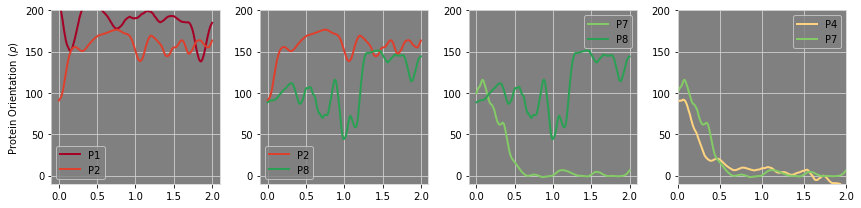

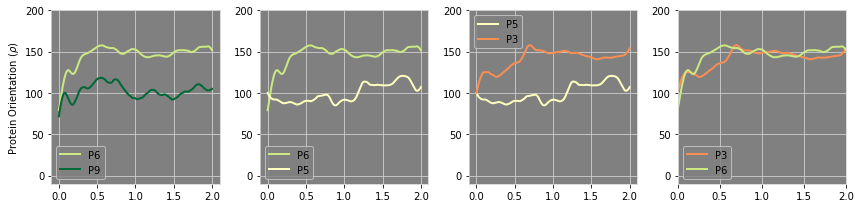

In [497]:
lim_=15
pairs_S11 = [[1,2],[2,8],[7,8],[4,7]]
plot_smooth(rho_HPD_prot, 'm', 'S1', pairs_S11, "C1")

pairs_S12 = [[6,9],[6,5],[5,3],[3,6]]
plot_smooth(rho_HPD_prot, 'm', 'S1', pairs_S12, "C2")


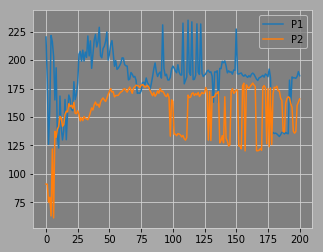

In [484]:
plt.figure(figsize=(5,4))
title='Orientation'
i, j = 1, 2
plt.plot(rho_HPD_prot['m']['S1']['P'+str(i)], label='P'+str(i))
plt.plot(rho_HPD_prot['m']['S1']['P'+str(j)], label='P'+str(j))
plt.legend()
plt.grid()

## Correlation $\rho$ vs pair clustering

0

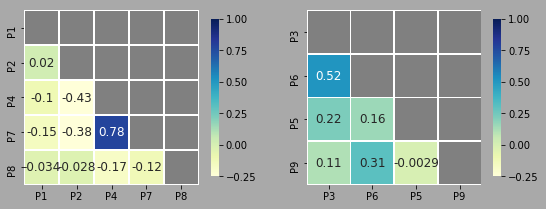

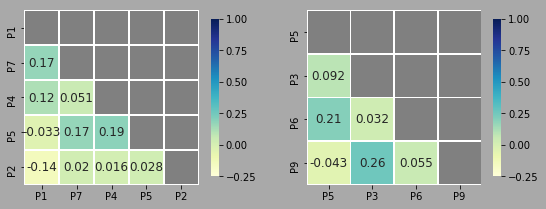

In [507]:
import pandas as pd
import math

def R(cor1, cor2, cor3, df):
    Rxyz = math.sqrt((abs(cor1**2) + abs(cor2**2) - 2*cor1*cor2*cor3) / (1-abs(cor2**2)) )
    print('R=', Rxyz)
    R2 = Rxyz**2

    # Calculate adjusted R-squared
    n = len(df) # Number of rows
    k = 2       # Number of independent variables
    R2_adj = 1 - ( ((1-R2)*(n-1)) / (n-k-1) )

    print("R^2", R2, R2_adj)

    return 0


def corr_pairs(dic, state, system, i, j):
    ki = 'P'+str(i)
    kj = 'P'+str(j)
    
    X = rho_HPD_prot[state][system][ki]
    Y = rho_HPD_prot[state][system][kj]
    #Z = get_distanceCM(state, system, ki, kj)
    
    delta = [ abs(xi-yi) for xi,yi in zip(X,Y)]


    df = pd.DataFrame({ki:X, kj: Y, "Delta": delta}) #, "d_CM": Z})

    x = ki
    y = kj
    #z = "d_CM"
    w = "Delta"

    cor = df.corr()
    print(cor)
    
    #xz = cor.loc[ x, z ]
    #yz = cor.loc[ y, z ]
    xy = cor.loc[ x, y ]


    xw = cor.loc[ x, w ]
    yw = cor.loc[ y, w ]
    #wz = cor.loc[ w, z ]

    print('=====')
    print("Pairs ",i , j)
    print("Corr:", xw, yw, xy)
    
    
    
    R(xw, yw, xy, df)
    
    return cor

def corr_system(dic, state, system, clust):
    
    


    df = pd.DataFrame({"P"+str(i):rho_HPD_prot[state][system]["P"+str(i)] for i in range(1,10)})  #, "d_CM": Z})

    cor = df.corr()
    print(cor)

    mask = np.zeros_like(cor, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(8, 5))
    sns.heatmap(cor, mask=mask, cmap="YlGnBu", square=True, linewidths=.5, cbar_kws={"shrink": .5})#, annot=True, annot_kws={'fontsize': 12})
    
    return cor

def corr_cluster(dic, state, system, clust1, clust2):
    
    df1 = pd.DataFrame({"P"+str(i):rho_HPD_prot[state][system]["P"+str(i)] for i in clust1})
    df2 = pd.DataFrame({"P"+str(i):rho_HPD_prot[state][system]["P"+str(i)] for i in clust2})

    cor1 = df1.corr()
    cor2 = df2.corr()
    #print(cor1)

    mask1 = np.zeros_like(cor1, dtype=np.bool)
    mask1[np.triu_indices_from(mask1)] = True
    
    mask2 = np.zeros_like(cor2, dtype=np.bool)
    mask2[np.triu_indices_from(mask2)] = True
    
    fig = plt.figure(figsize=(8,3))
    ax1 = fig.add_subplot(121)
    sns.heatmap(cor1, mask=mask1, cmap="YlGnBu", square=True, linewidths=.5, cbar_kws={"shrink": .9},annot=True, annot_kws={'fontsize': 12}, vmin=-0.25, vmax=1)
    ax2 = fig.add_subplot(122)
    sns.heatmap(cor2, mask=mask2, cmap="YlGnBu", square=True, linewidths=.5, cbar_kws={"shrink": .9},annot=True, annot_kws={'fontsize': 12}, vmin=-0.25, vmax=1)
    fig.tight_layout()
    fig.savefig("corr_heatmap_"+state+system+".png", dpi=300)
    return 0

#corr_system(rho_HPD_prot, 'm', 'S1', [i for i in range(1,10)])

corr_cluster(rho_HPD_prot, 'm', 'S1', [1,2,4,7,8], [3,6,5,9])
corr_cluster(rho_HPD_prot, 'm', 'S2', [1,7,4,5,2], [5,3,6,9])

In [488]:
import seaborn as sns

pairs =  {"S"+str(key):[] for key in range(1,4)}

pairs["S1"]=[4,7],[1,2],[2,8],[7,8],[6,9],[6,5],[5,3],[3,6],[9,5]
pairs["S2"]=[9,6],[6,3],[3,8],[3,8],[8,6],[1,7],[4,5],[5,2]

count = -1
for system in pairs.keys():
    
    for i in pairs[system]:
        count = count + 1   
        print(system, count, i[0])#, pairs[system][i][0])
        
        corr = corr_pairs(rho_HPD_prot, 'm', system, i[0], i[1])

    

S1 0 4
             P4        P7     Delta
P4     1.000000  0.783256  0.345658
P7     0.783256  1.000000  0.722399
Delta  0.345658  0.722399  1.000000
=====
Pairs  4 7
Corr: 0.345657779712413 0.7223993550407899 0.7832557026762877
R= 0.7233476039306034
R^2 0.523231756112145 0.5184159152647929
S1 1 1
             P1        P2     Delta
P1     1.000000  0.019531  0.448851
P2     0.019531  1.000000 -0.746577
Delta  0.448851 -0.746577  1.000000
=====
Pairs  1 2
Corr: 0.44885126145107324 -0.7465768344157638 0.019530890904076503
R= 1.3206055273168453
R^2 1.743998958779803 1.7515140997775789
S1 2 2
             P2        P8     Delta
P2     1.000000 -0.027619  0.265329
P8    -0.027619  1.000000 -0.944493
Delta  0.265329 -0.944493  1.000000
=====
Pairs  2 8
Corr: 0.265328998535458 -0.9444931327036434 -0.027619006580010437
R= 2.964629976309223
R^2 8.789030896431225 8.867707976193156
S1 3 7
             P7        P8     Delta
P7     1.000000 -0.118648 -0.440226
P8    -0.118648  1.000000  0.906674

In [337]:
def all_prots(dic_prots):
        
    total_prots = []
    
    for key in dic_prots.keys():
        for protein in dic_prots[key].keys():
            for tau in dic_prots[key][protein]:
                total_prots.append(tau) 
            
    return total_prots

def plot_compregs(dic_LPD, dic_HPD, state):
    
    if state == 'm':
            label_ = 'Open state'
            color_ = 'darkorange'
            #namef_ = 'Distribution_openLPD.png'

    if state == 'h':
        label_ = 'Closed state'
        color_ = 'gold'
        #namef_ = 'Distribution_closedLPD.png'

    
    plt.figure(figsize=(10,6))

    
    plt.hist(dic_HPD, color = color_, bins =7, label='HPD '+label_ , alpha=0.65, edgecolor = 'gray', linewidth=0)
    plt.hist(dic_LPD, color = color_, bins =7, label='LPD '+label_ , alpha=0.8, hatch= '/', edgecolor = 'gray', linewidth=0)
    
    plt.xlabel("$\\tau$", fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # plt.ylim([0,10])
    # plt.xlim([0.65,0.95])

    plt.legend(loc=2, fontsize=14)
    plt.grid(True)
    plt.show()
    
    return 0

rho_HPD['m'] = all_prots(rho_HPD_prot['m'])

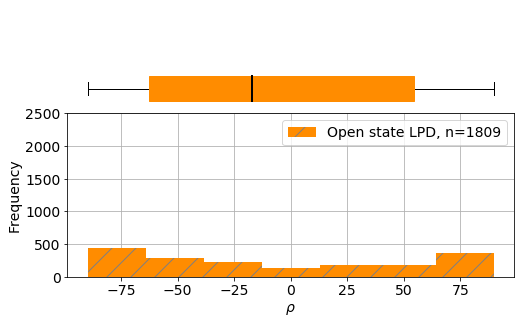

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

        
def plot_distribution(dic_tau, states):
    
    gaussian_dic = {key: {v:0 for v in ["mean", "std_error"] } for key in states}
    
    for state in states:    
       
        gaussian_dic[state]['mean']=np.mean(dic_tau[state])
        gaussian_dic[state]['mean']=np.std(dic_tau[state])
        #print(np.mean(dic_tau[state]), np.std(dic_tau[state]))
        #print('State: {}, (Mean +/- Err)= {:.2f} +/- {:.2f}'.format(state, gaussian_dic[state]['mean'], gaussian_dic[state]['std_error'] ))

        if state == 'm':
            label_ = 'Open state LPD, n='+str(len(dic_tau['m']))
            color_ = 'darkorange'
            namef_ = 'Distribution_openLPD.png'

        if state == 'h':
            label_ = 'Closed state LPD, n='+str(len(dic_tau['h']))
            color_ = 'gold'
            namef_ = 'Distribution_closedLPD.png'

        n_samples = len(dic_tau[state])

    
        sigma_conf = gaussian_dic[state]['std_error']
        mu_conf = gaussian_dic[state]['mean']
        mu, std = norm.fit(dic_tau[state])
        #x = np.linspace(min(dic_tau[state])-0.01, max(dic_tau[state])+0.01, len(dic_tau[state]))
        y = norm.pdf(mu_conf, sigma_conf)
        
                
        plt.rc('axes', axisbelow=True)
        
        plt.figure(figsize=(8,6))
        plt.subplot(2,1,1)
        plt.boxplot(dic_tau[state], vert=False, patch_artist=True, medianprops=dict(color='black', linewidth=2), boxprops=dict(color=color_, facecolor=color_))    
        plt.axis('off')
        #plt.xlim([0.65,0.95])
        plt.subplot(2,1,2)
        plt.hist(dic_tau[state], color = color_, bins = 7, label=label_, alpha=1, hatch= '/', edgecolor = 'gray', linewidth=0 )
        plt.plot(y, color='red', linewidth=2)
        plt.xlabel("$\\rho$", fontsize=14)
        plt.ylim([0,2500])
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        #plt.xlim([0.65,0.95])
        plt.ylabel('Frequency', fontsize=14)
        plt.legend(fontsize=14)
        plt.subplots_adjust(hspace=-0.35, top=0.75)
        plt.grid(True)
        #plt.savefig(namef_, dpi=300)
        plt.show()
        
plot_distribution(rho_HPD, 'm')
